In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df=df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
],axis=1)

In [5]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Attrition_Flag"]=encoder.fit_transform(df["Attrition_Flag"])
df=df[df["Education_Level"]!="Unknown"]
df_gender = pd.get_dummies(df["Gender"])
df = pd.concat([df,df_gender], axis=1)
df = df.drop("Gender",axis=1)
df_married = pd.get_dummies(df["Marital_Status"])
df = pd.concat([df,df_married], axis=1)
df = df.drop('Marital_Status',axis=1)
df_Card_Category = pd.get_dummies(df["Card_Category"])
df = pd.concat([df,df_Card_Category], axis=1)
df = df.drop('Card_Category',axis=1)

In [7]:
mapping={'Unknown':0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
df=df.replace(mapping)
ed_mapping = {'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
df=df.replace(ed_mapping)

In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,F,M,Divorced,Married,Single,Unknown,Blue,Gold,Platinum,Silver
0,768805383,1,45,3,2,3,39,5,1,3,...,0,1,0,1,0,0,1,0,0,0
1,818770008,1,49,5,4,1,44,6,1,2,...,1,0,0,0,1,0,1,0,0,0
2,713982108,1,51,3,4,4,36,4,1,0,...,0,1,0,1,0,0,1,0,0,0
3,769911858,1,40,4,2,1,34,3,4,1,...,1,0,0,0,0,1,1,0,0,0
4,709106358,1,40,3,1,3,21,5,1,0,...,0,1,0,1,0,0,1,0,0,0


In [9]:
df = df.drop("CLIENTNUM",axis=1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_rescaled = scaler.fit_transform(df.drop("Attrition_Flag",axis=1))

Text(0.5, 0.85, '95% cut-off threshold')

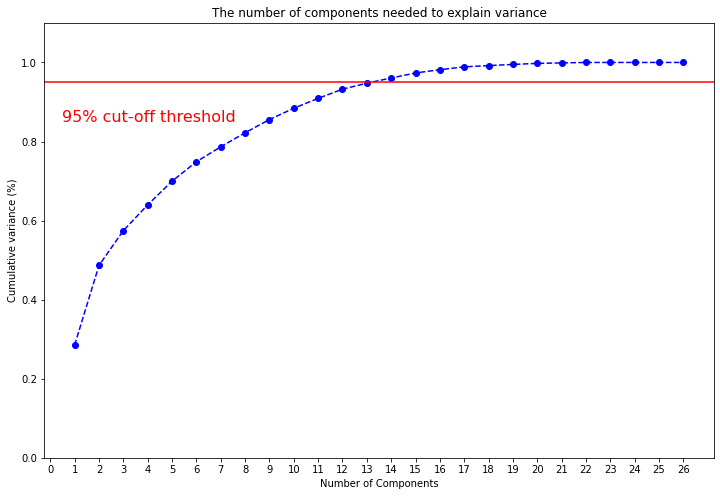

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_rescaled)
plt.figure(figsize=(12,8))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

In [12]:
pca14 = PCA(n_components=14)
principalComponents_14=pca14.fit_transform(df_rescaled)
PCA_VARS14=pca14.explained_variance_ratio_
print('Explained variance with 7 principal components:',100*np.sum(PCA_VARS14),'%')

Explained variance with 7 principal components: 96.07115536231125 %


In [13]:
principalComponents_14

array([[ 0.79457769, -0.67378195, -0.06550698, ...,  0.03070355,
         0.02517919, -0.20163715],
       [-0.65346922,  0.74056559,  0.05831436, ..., -0.16850564,
        -0.09702119, -0.20217273],
       [ 0.75999043, -0.69267182, -0.16051696, ..., -0.07717277,
        -0.51877507, -0.20358489],
       ...,
       [-0.65980464, -0.61022626,  0.33812305, ..., -0.12216488,
         0.2910953 ,  0.05810123],
       [ 0.66825959,  0.08584683, -0.01044236, ..., -0.03728523,
         0.14739371,  0.14316963],
       [-0.52960287, -0.57141412,  0.91149338, ..., -0.10311498,
         0.25667759, -0.10332036]])

<AxesSubplot:>

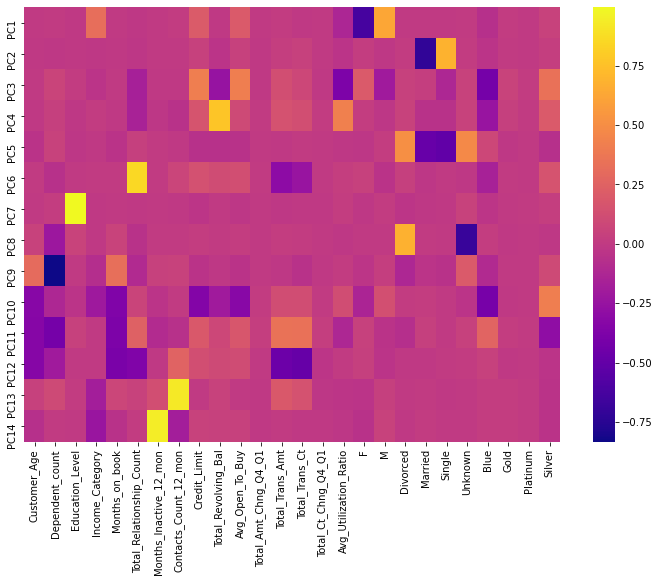

In [26]:
df_comp = pd.DataFrame(pca14.components_, columns=df.drop("Attrition_Flag",axis=1).columns,index=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7',
                                                    'PC8', 'PC9','PC10','PC11','PC12','PC13','PC14'])
plt.figure(figsize=(12,8))
sns.heatmap(df_comp,cmap='plasma')

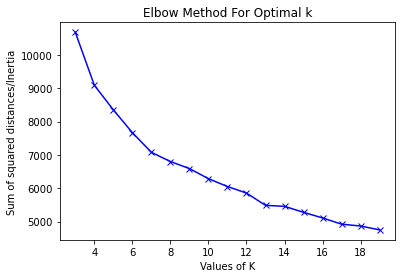

In [15]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(3,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(principalComponents_14)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

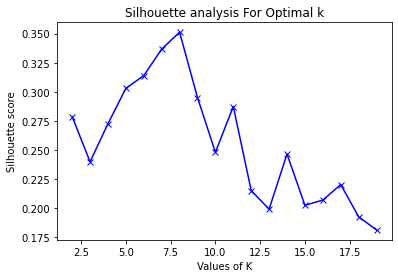

In [16]:
from sklearn.metrics import silhouette_score
K = range(2,20)
silhouette_avg = []
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(principalComponents_14)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(principalComponents_14, cluster_labels))
plt.plot(K,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [17]:
bestmodel = KMeans(n_clusters=8)
bestmodel.fit(principalComponents_14)

KMeans()

In [43]:
df_pca = pd.DataFrame(principalComponents_14,columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7',
                                                    'PC8', 'PC9','PC10','PC11','PC12','PC13','PC14'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.794578,-0.673782,-0.065507,-0.314596,-0.089348,0.231627,-0.216367,-0.048367,-0.125848,-0.053114,-0.054302,0.030704,0.025179,-0.201637
1,-0.653469,0.740566,0.058314,-0.280530,-0.139053,0.467020,0.182554,-0.125220,-0.455900,-0.303650,-0.224377,-0.168506,-0.097021,-0.202173
2,0.759990,-0.692672,-0.160517,-0.606174,-0.061986,-0.048343,0.198546,-0.030882,-0.097285,0.079041,-0.220260,-0.077173,-0.518775,-0.203585
3,-0.798778,0.027210,-0.250478,0.635604,0.814967,0.005336,-0.139114,-0.793700,-0.077054,-0.169168,-0.279842,0.299357,-0.259896,0.306915
4,0.710669,-0.681644,-0.161729,-0.618457,-0.019532,0.128793,-0.400559,-0.105243,-0.289079,0.334751,0.025466,0.071591,-0.520473,-0.119000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,-0.705889,0.798843,0.129666,-0.169046,-0.185438,-0.242346,0.160571,0.110600,0.331446,-0.042213,0.292833,-0.574902,0.394528,-0.300191
8604,0.574452,0.738980,-0.476395,0.348011,-0.156825,-0.475646,0.195918,0.056325,0.108250,0.212683,0.211201,-0.484613,0.304073,-0.032929
8605,-0.659805,-0.610226,0.338123,-0.534333,-0.104738,0.071798,-0.246641,0.045711,0.184444,0.102876,0.317678,-0.122165,0.291095,0.058101
8606,0.668260,0.085847,-0.010442,-0.445915,0.900053,-0.179562,0.249042,-0.675956,0.217772,0.305366,0.189908,-0.037285,0.147394,0.143170


In [47]:
df_pca["labels"]=bestmodel.labels_

In [48]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,labels
0,0.794578,-0.673782,-0.065507,-0.314596,-0.089348,0.231627,-0.216367,-0.048367,-0.125848,-0.053114,-0.054302,0.030704,0.025179,-0.201637,0
1,-0.653469,0.740566,0.058314,-0.280530,-0.139053,0.467020,0.182554,-0.125220,-0.455900,-0.303650,-0.224377,-0.168506,-0.097021,-0.202173,1
2,0.759990,-0.692672,-0.160517,-0.606174,-0.061986,-0.048343,0.198546,-0.030882,-0.097285,0.079041,-0.220260,-0.077173,-0.518775,-0.203585,0
3,-0.798778,0.027210,-0.250478,0.635604,0.814967,0.005336,-0.139114,-0.793700,-0.077054,-0.169168,-0.279842,0.299357,-0.259896,0.306915,5
4,0.710669,-0.681644,-0.161729,-0.618457,-0.019532,0.128793,-0.400559,-0.105243,-0.289079,0.334751,0.025466,0.071591,-0.520473,-0.119000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,-0.705889,0.798843,0.129666,-0.169046,-0.185438,-0.242346,0.160571,0.110600,0.331446,-0.042213,0.292833,-0.574902,0.394528,-0.300191,1
8604,0.574452,0.738980,-0.476395,0.348011,-0.156825,-0.475646,0.195918,0.056325,0.108250,0.212683,0.211201,-0.484613,0.304073,-0.032929,4
8605,-0.659805,-0.610226,0.338123,-0.534333,-0.104738,0.071798,-0.246641,0.045711,0.184444,0.102876,0.317678,-0.122165,0.291095,0.058101,3
8606,0.668260,0.085847,-0.010442,-0.445915,0.900053,-0.179562,0.249042,-0.675956,0.217772,0.305366,0.189908,-0.037285,0.147394,0.143170,7


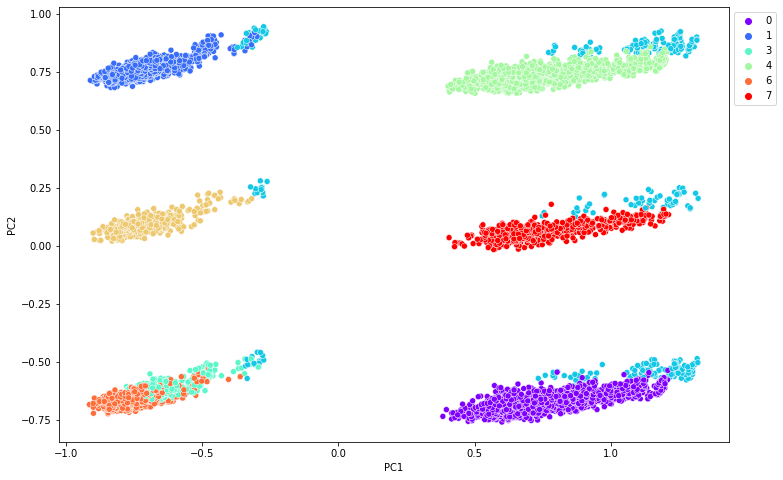

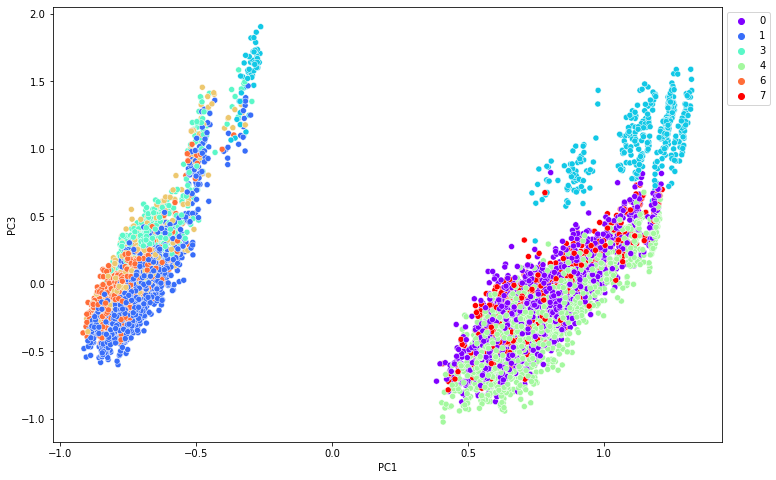

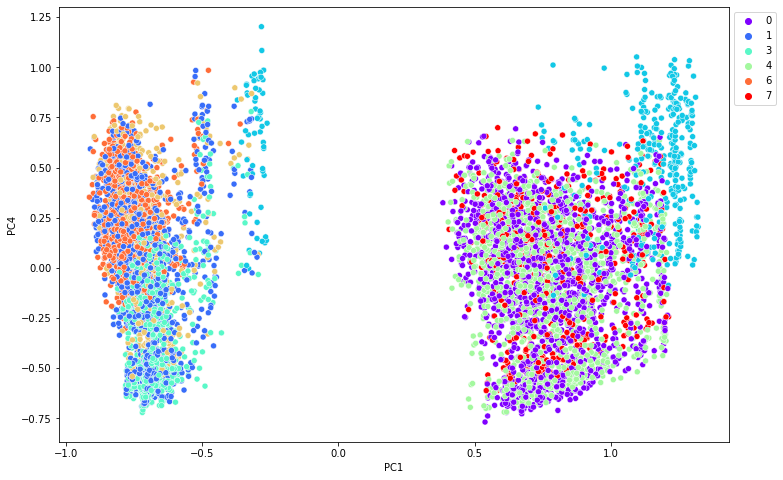

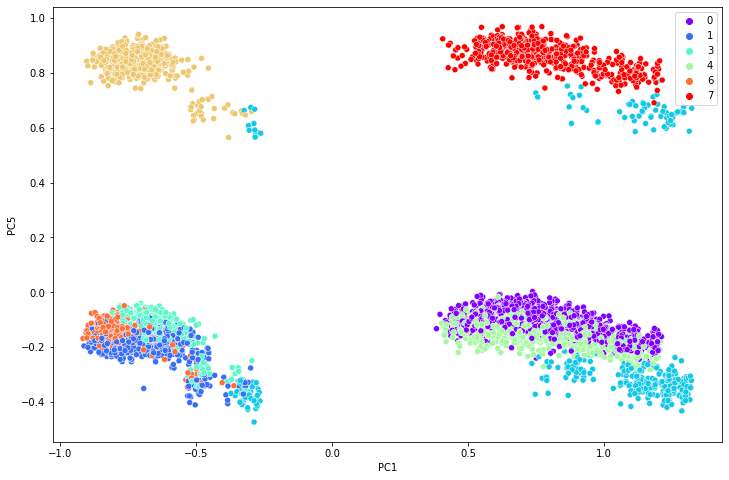

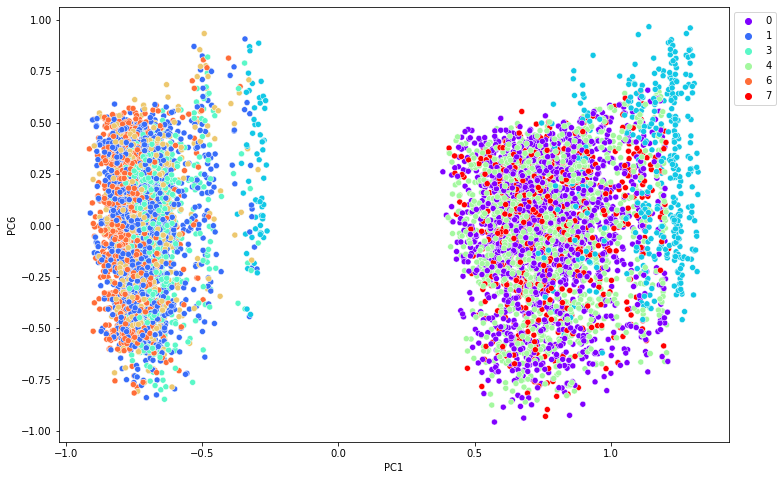

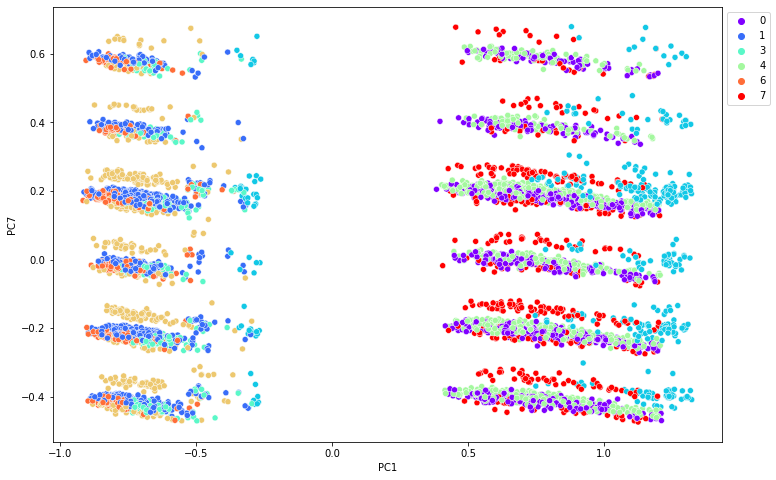

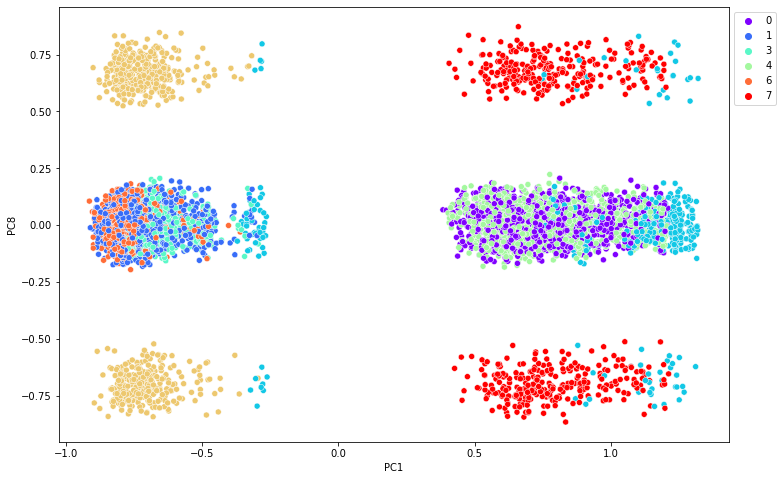

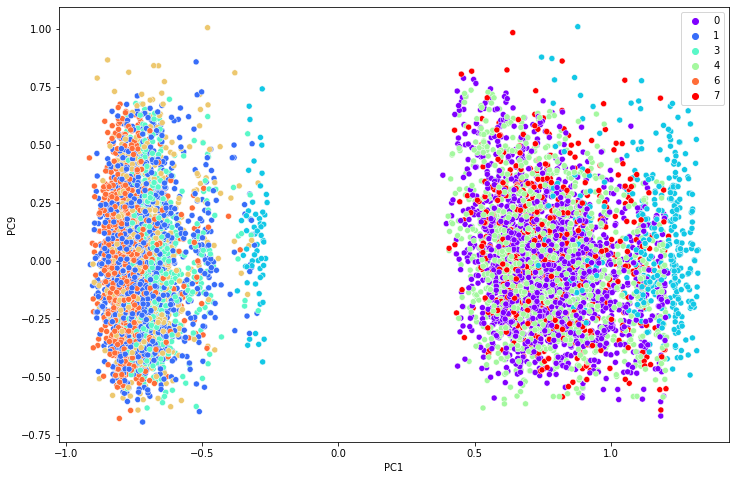

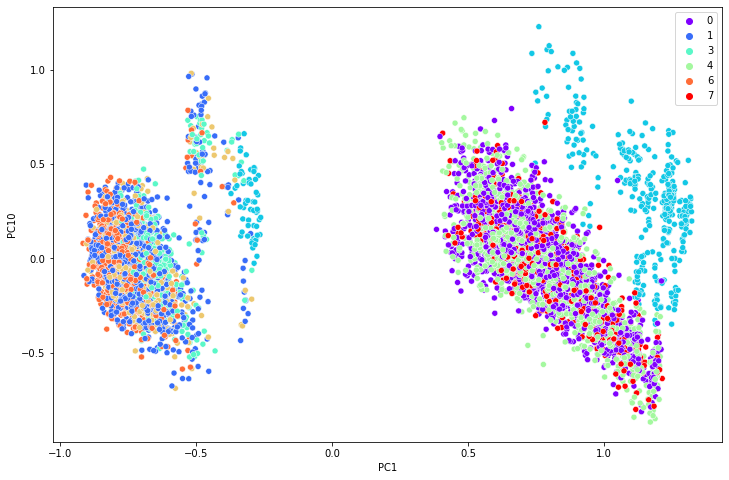

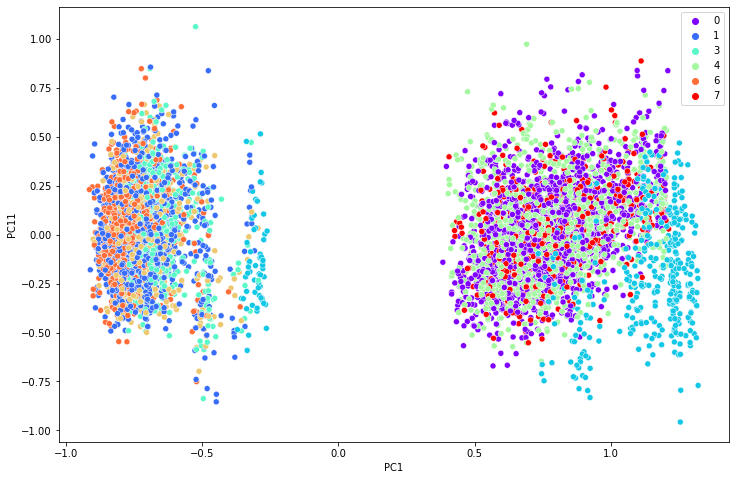

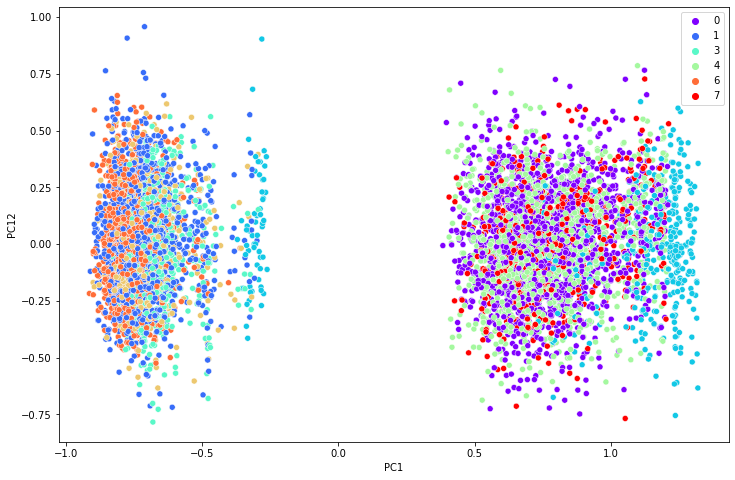

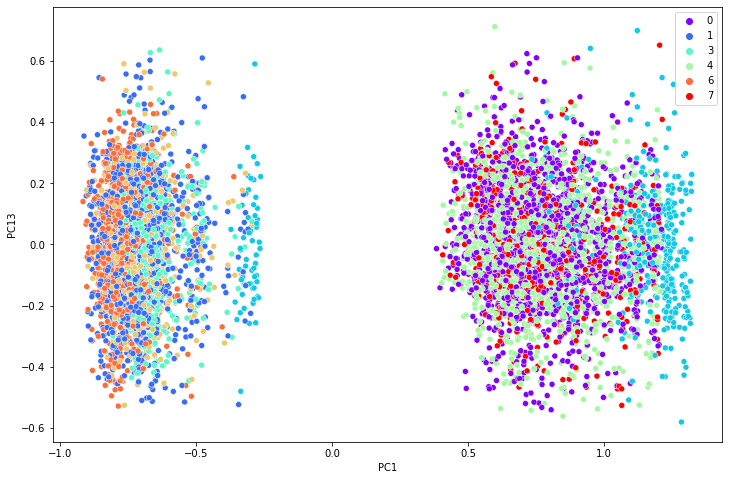

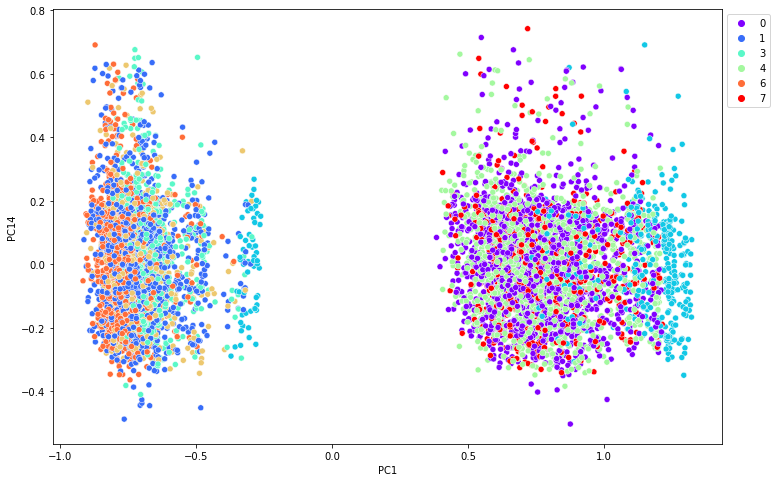

In [72]:
for i in range(2,15):
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df_pca,x="PC1",y=f"PC{i}",hue="labels",palette="rainbow")
    plt.legend(bbox_to_anchor=(1, 1))